# Indoor Semantic Image Segmentation

**Notebook created in PyTorch by [ Xavier Riera, Albert Mestre, José Javier Gómez] for the [UPC School](https://www.talent.upc.edu/ing/estudis/formacio/curs/310400/postgraduate-course-artificial-intelligence-deep-learning/) (2020).**



#Initialization


In [ ]:
from google.colab import drive
drive.mount('/content/drive/', force_remount=True)

Mounted at /content/drive/


In [ ]:
!pip install gdown
!gdown "https://drive.google.com/uc?id=1pxs-HG4ZehoER60mkz8M4ga2y_NWXmeP"
!tar -zxf Images-20200929.tar.gz

Downloading...
From: https://drive.google.com/uc?id=1uoIGkGXkSDtjWKsHb_0f2CXbyfm0ZsLJ
To: /content/Images-20200929.tar.gz
523MB [00:06, 79.4MB/s]


In [ ]:
#DIRECTORY
directory = 'drive/My Drive/Compartida con Albert/'
#directory = 'drive/My Drive/'

#mypythondirectory
mypythondirectory = directory + 'Google Colabs/Scripts/'


#PATH_IMAGES
#PATH_IMG = directory + 'Images/'
PATH_IMG = '/content/Images/'

#PATH_EXP
PATH_EXP = directory + 'Experiments/' + 'Unet/'


fparams = {
    
    #PATTERNS
    'train': 'train',
    'test': 'test',
    'validation': 'validation',
    'label': 'label',
}

#Importing
import sys
sys.path.append(mypythondirectory)

import utils
import metrics
import models 

#variable to relate identifier-mean of clases
class_name_13 = ['bed', 'books', 'ceiling', 'chair', 'floor', 'furniture', 'objects', 'picture', 'sofa', 'table', 'tv', 'wall', 'window']

#Variable to define colors of classes
color_class_13  = ['#0000FF', '#E95930', '#00DA00', '#9500F0', '#DEF118', '#FFCECE', '#00E0E5', '#6A88CC', '#751D29', '#F023EB', '#00A79C', '#F98B00', '#E1E5C2']


In [ ]:
import torch
import numpy as np
from torchvision import transforms
from torchvision import transforms
from skimage import io
import matplotlib.pyplot as plt


In [ ]:
def get_input_target(PATH_IMG, namesplit, id, fparams=fparams, showlabel = False) :
  
  image=io.imread(PATH_IMG + str(id) + '_' + fparams[namesplit] + '.png')
  plt.imshow(image)
  plt.title("Image") 
  plt.show()

  target=io.imread(PATH_IMG + str(id) + '_' + fparams[namesplit] +'_' + fparams['label'] + '.png')
  target = torch.from_numpy(target)
  
  if showlabel :
    pixtarget = utils.array_colors_13(target)
    plt.imshow(pixtarget)
    plt.title("Label") 
    plt.show()

  input = transforms.functional.to_tensor(np.array(image))
  input = input.unsqueeze(0)

  return input,target

In [ ]:
def prediction_plot(weights, input, target, network = models.Unet()) :
  network.load_state_dict(weights)
  output = network(input)
            
  prediction = output.argmax(dim=1)
  prediction = prediction.squeeze()

  #Add 255 labels in place where are not labeled
  prediction = utils.add255Label(target, prediction)

  pixprediction = utils.array_colors_13(prediction)
  plt.imshow(pixprediction)
  plt.title("Prediction") 
  plt.show()

In [ ]:
if not torch.cuda.is_available():
    raise RuntimeError("You should enable GPU runtime!!")

def summary(path_exp, name_experiment, filename='model_best.pth.tar', network = models.Unet(), showprediction = True ):
  state = utils.load_checkpoint(path_exp + name_experiment + '/', filename)
  best_iou        = state['iou']
  best_iou_dict   = state['iou_dict']
  best_epoch_acc  = state['acc']
  best_epoch      = state['epoch']
  weights         = state['weights']
  print("-------------------------------------------------------------------------------------------------------------------")
  print("Summary: ")
  print("Best epoch = " + str(best_epoch) + ". IoU = " + str(best_iou) + ". Pixel Accuracy = " + str(best_epoch_acc) + "." )
  if showprediction : 
    prediction_plot(weights, input, target, network)
  metrics.plot("IoU", best_iou_dict, class_name_13, color_class_13, number_of_classes = 13)

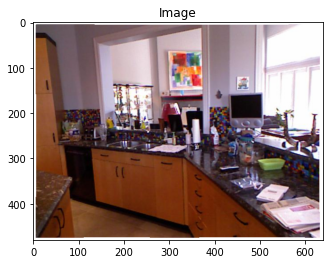

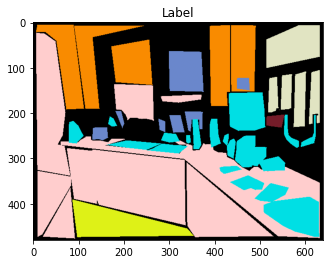

In [ ]:
input, target = get_input_target(PATH_IMG, 'validation', 35, showlabel = True)

In [ ]:
print ("!ls '" + PATH_EXP + "'")

!ls 'drive/My Drive/Results/Unet/'


In [ ]:
!ls 'drive/My Drive/Results/Unet/'

 ADAM-LR3-WITHOUT-WEIGHT_DECAY-NORMALIZE_16102020
 ADAM-LR3-WITH-WEIGHT_DECAY_NORMALIZE_17102020
'ADAM LR 5e-4 DECAY 0 DROPOUT 0.2 (Best_Optim_and_Dropout_02_v3)'
'ADAM LR 5e-4 DECAY 0 DROPOUT 0.5 (Best_Optim_and_Dropout_05_v2)'
'ADAM LR 5e-4 DECAY 1e-4 DROPOUT 0.2 (Dropout_02_Best_Optim)'
'ADAM LR 5e-4 DECAY 1e-4 (EXP_ALBERT_21_10)'
'ADAM LR 5e-4 WD 0 DROPOUT 0.2 WEIGHTEDLOSS (Dropout_and_Weighted_v2)'
'ADAM LR 5e-4 WD 1e-4 DROP 0.2 (Data_Aumentation)'
'ADAM LR 5e-4 WD 1e-4 DROP 0.2  (Horizontal_Flip)'
'ADAM LR 5e-4 WD 1e-4 DROP 0.2  (PD_ADAM_LR5_WD_02112020)'
'ADAM LR 5e-4 WD 1e-4 DROP 0.2  WEIGHTED (Dropout_02_Best_Optim_Weighted_v2)'
'ADAM LR 5e-4 WD 1e-4 DROP 0.2  WEIGHTED (Dropout_02_Best_Optim_Weighted_v3)'
 ADAM-LR5-WITHOUT-WEIGHT_DECAY-NOT_NORMALIZE_16102020
 ColorJitter_v3
 HorizontalFlip_Corregido_v2
 PD_ADAM_LR5_WD_DROP_2_BATCH16_LAYER4_BOTTLENECK256_09112020_1000
'SGD LR 1e-3 DECAY 0(SGD-WITHOUT-WEIGHT_DECAY_18102020)'
'SGD LR 1e-3 DECAY 1e-4 (SGD-WITH-WEIGHT_DECAY_1810202

In [ ]:
print("%tensorboard --logdir '" + PATH_EXP + "' --samples_per_plugin=images=400")

%tensorboard --logdir 'drive/My Drive/Results/Unet/' --samples_per_plugin=images=400


In [ ]:
%reload_ext tensorboard
%tensorboard --logdir 'drive/My Drive/Results/Unet/' --samples_per_plugin=images=400

#OPTIM

-------------------------------------------------------------------------------------------------------------------
Summary: 
Best epoch = 165. IoU = 0.4108983184996642. Pixel Accuracy = 0.6573132839359348.


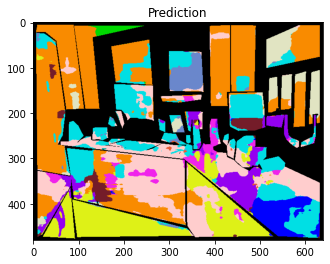

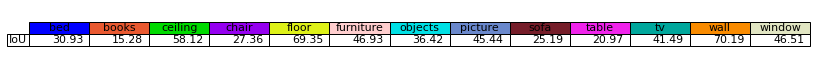

In [ ]:
summary(PATH_EXP, 'ADAM-LR3-WITHOUT-WEIGHT_DECAY-NORMALIZE_16102020')

-------------------------------------------------------------------------------------------------------------------
Summary: 
Best epoch = 191. IoU = 0.4164414948438266. Pixel Accuracy = 0.672768713652953.


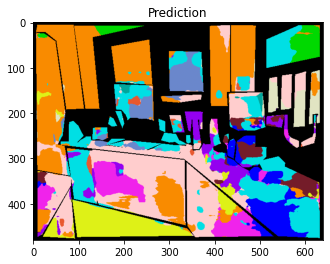

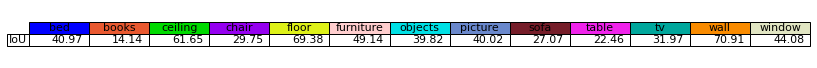

In [ ]:
summary(PATH_EXP, 'ADAM-LR5-WITHOUT-WEIGHT_DECAY-NOT_NORMALIZE_16102020')

-------------------------------------------------------------------------------------------------------------------
Summary: 
Best epoch = 216. IoU = 0.4254554260566955. Pixel Accuracy = 0.6750783666349364.


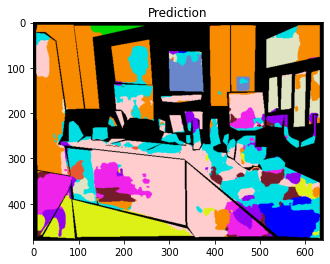

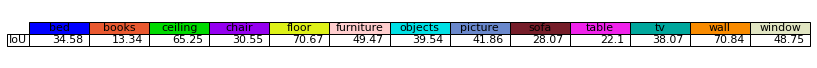

In [ ]:
summary(PATH_EXP, 'ADAM LR 5e-4 DECAY 1e-4 (EXP_ALBERT_21_10)')

-------------------------------------------------------------------------------------------------------------------
Summary: 
Best epoch = 323. IoU = 0.3314627299724028. Pixel Accuracy = 0.6056630927692891.


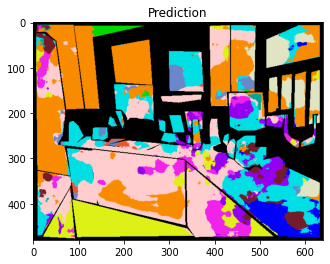

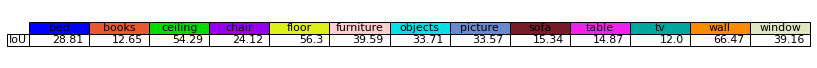

In [ ]:
summary(PATH_EXP, 'SGD LR 1e-3 DECAY 0(SGD-WITHOUT-WEIGHT_DECAY_18102020)')

-------------------------------------------------------------------------------------------------------------------
Summary: 
Best epoch = 341. IoU = 0.34352417134233676. Pixel Accuracy = 0.6165146907546643.


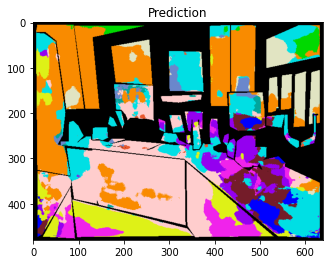

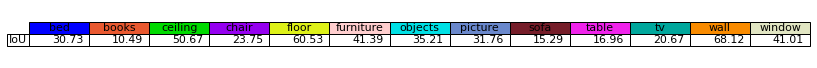

In [ ]:
summary(PATH_EXP, 'SGD LR 1e-3 DECAY 1e-4 (SGD-WITH-WEIGHT_DECAY_18102020)')

-------------------------------------------------------------------------------------------------------------------
Summary: 
Best epoch = 379. IoU = 0.30594580743002814. Pixel Accuracy = 0.5890790837616036.


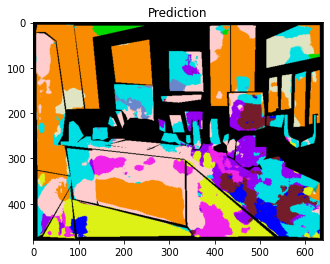

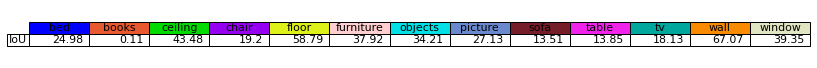

In [ ]:
summary(PATH_EXP, 'SGD LR 5e-4 DECAY 1e-4 (SGD-LR5-WITH-WEIGHT_DECAY_29102020)')


-------------------------------------------------------------------------------------------------------------------
Summary: 
Best epoch = 399. IoU = 0.2912894002652022. Pixel Accuracy = 0.5844326371652966.


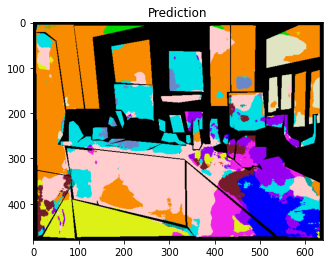

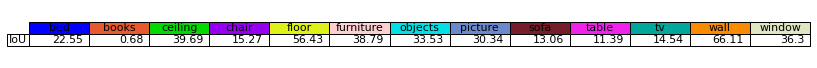

In [ ]:
summary(PATH_EXP, 'SGD-LR5-WITHOUT-WEIGHT_DECAY_27102020')

-------------------------------------------------------------------------------------------------------------------
Summary: 
Best epoch = 379. IoU = 0.30594580743002814. Pixel Accuracy = 0.5890790837616036.


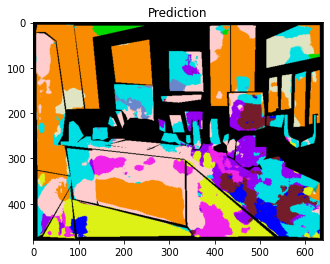

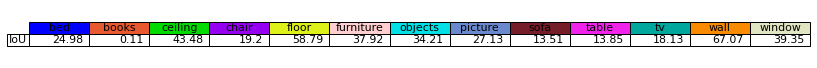

In [ ]:
 summary(PATH_EXP, 'SGD-LR5-WITH-WEIGHT_DECAY_29102020')

#BEST OPTIM

-------------------------------------------------------------------------------------------------------------------
Summary: 
Best epoch = 421. IoU = 0.41344217280998785. Pixel Accuracy = 0.6859910729277492.


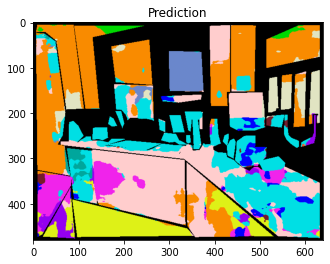

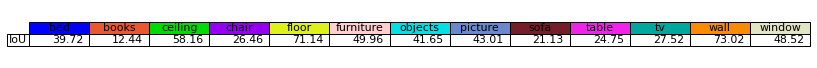

In [ ]:
summary(PATH_EXP, 'ADAM LR 5e-4 DECAY 0 DROPOUT 0.5 (Best_Optim_and_Dropout_05_v2)')

-------------------------------------------------------------------------------------------------------------------
Summary: 
Best epoch = 354. IoU = 0.4259322395359647. Pixel Accuracy = 0.6858622338151188.


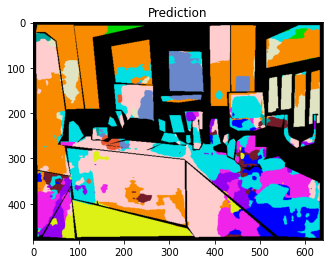

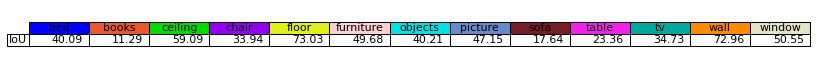

In [ ]:
summary(PATH_EXP, 'ADAM LR 5e-4 DECAY 0 DROPOUT 0.2 (Best_Optim_and_Dropout_02_v3)')

-------------------------------------------------------------------------------------------------------------------
Summary: 
Best epoch = 421. IoU = 0.41344217280998785. Pixel Accuracy = 0.6859910729277492.


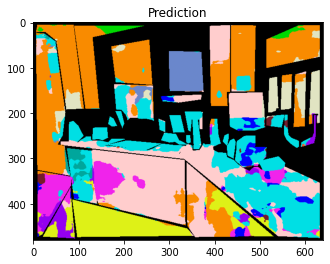

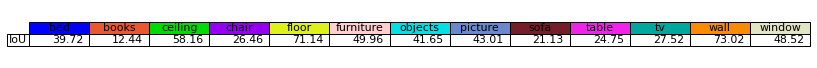

In [ ]:
summary(PATH_EXP, 'ADAM LR 5e-4 DECAY 0 DROPOUT 0.5 (Best_Optim_and_Dropout_05_v2)')

-------------------------------------------------------------------------------------------------------------------
Summary: 
Best epoch = 412. IoU = 0.4248073604354368. Pixel Accuracy = 0.6930270304996811.


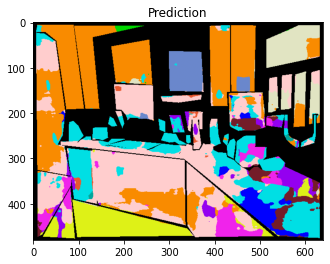

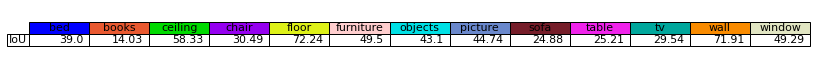

In [ ]:
summary(PATH_EXP, 'ADAM LR 5e-4 DECAY 1e-4 DROPOUT 0.2 (Dropout_02_Best_Optim)')

-------------------------------------------------------------------------------------------------------------------
Summary: 
Best epoch = 302. IoU = 0.4099004696580717. Pixel Accuracy = 0.668734655784115.


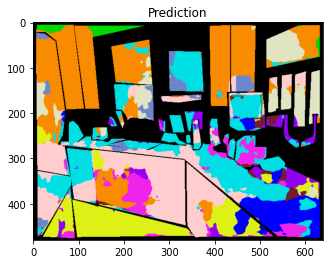

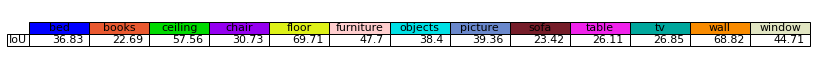

In [ ]:
summary(PATH_EXP, 'ADAM LR 5e-4 WD 1e-4 DROP 0.2  WEIGHTED (Dropout_02_Best_Optim_Weighted_v3)')

-------------------------------------------------------------------------------------------------------------------
Summary: 
Best epoch = 217. IoU = 0.2308060271672658. Pixel Accuracy = 0.5115771199056488.


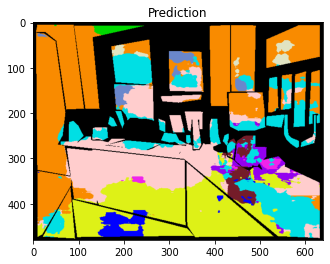

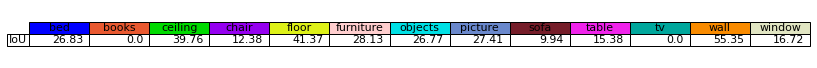

In [ ]:
summary(PATH_EXP, 'ADAM LR 5e-4 WD 1e-4 DROP 0.2 (Data_Aumentation)')

-------------------------------------------------------------------------------------------------------------------
Summary: 
Best epoch = 150. IoU = 0.3681721448971637. Pixel Accuracy = 0.6102422156787435.


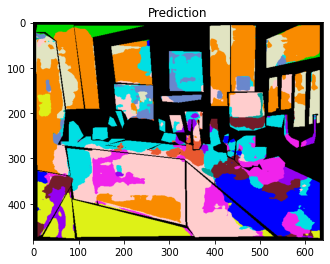

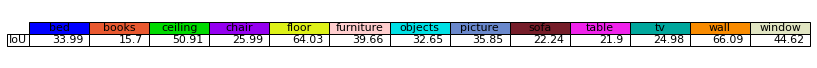

In [ ]:
summary(PATH_EXP, 'ADAM LR 5e-4 WD 1e-4 DROP 0.2  WEIGHTED (Dropout_02_Best_Optim_Weighted_v2)')

-------------------------------------------------------------------------------------------------------------------
Summary: 
Best epoch = 209. IoU = 0.3341617970474623. Pixel Accuracy = 0.6090871073361099.


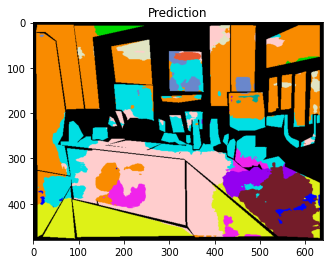

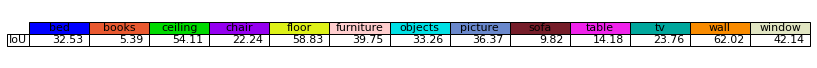

In [ ]:
summary(PATH_EXP, 'ADAM LR 5e-4 WD 1e-4 DROP 0.2  (Horizontal_Flip)')

-------------------------------------------------------------------------------------------------------------------
Summary: 
Best epoch = 348. IoU = 0.4161230475398302. Pixel Accuracy = 0.6869823081610547.


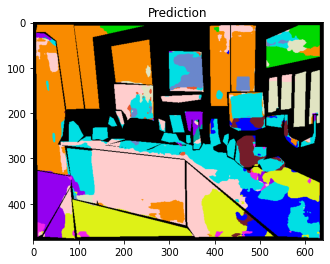

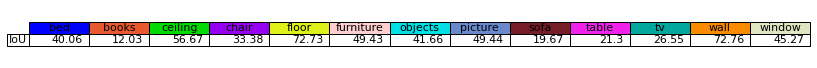

In [ ]:
summary(PATH_EXP, 'ColorJitter_v3')

-------------------------------------------------------------------------------------------------------------------
Summary: 
Best epoch = 414. IoU = 0.43559794341473. Pixel Accuracy = 0.696904564567746.


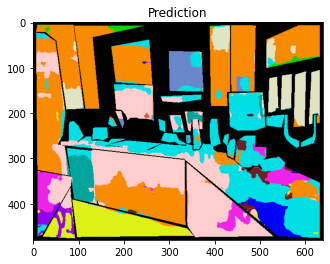

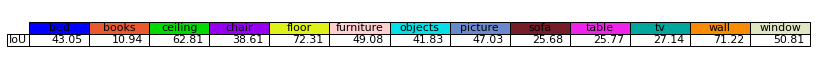

In [ ]:
summary(PATH_EXP, 'HorizontalFlip_Corregido_v2')